## Extract data from Web API - 政府資料開放平臺

### 1. Make a request to the API and grab the data.
### 2. Use the data to graph a plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [10]:
# Communicate with APIs with the Requests Package. And grab the lists of 'Info'.
url = 'https://gis.taiwan.net.tw/XMLReleaseALL_public/scenic_spot_C_f.json'
data_json = requests.get(url).json()['XML_Head']['Infos']['Info']
df = pd.DataFrame(data_json)

# Filter the column value and select the row included '博物館'.
filteredName = df['Name'].str.extract(r'(.*博物館)').dropna(axis=0,how='all')
df_filtered = pd.merge(filteredName, df, left_on=0, right_on='Name')

print(df_filtered.head(5))

          0                    Id      Name Zone  \
0   澎湖生活博物館  C1_315080600H_000056   澎湖生活博物館        
1   木生昆蟲博物館  C1_315081100H_000106   木生昆蟲博物館        
2  龍南天然漆博物館  C1_315081100H_000171  龍南天然漆博物館        
3   中台世界博物館  C1_315081100H_000368   中台世界博物館        
4    台灣鹽博物館  C1_315081600H_000070    台灣鹽博物館        

                                         Toldescribe  \
0  2010年正式開館營運，是臺灣第一座城市博物館，全館展示以真實的標本文物、文獻、圖片、生態造...   
1  木生昆蟲博物館緊鄰於牛耳藝術渡假村，館內珍藏了許多世界各地著名的蝴蝶和昆蟲標本，目前為世界上...   
2  位於北平街埔里國小旁，以展示臺灣傳統天然漆的發展歷史集產業文物為主題，持續發揚天然漆的文化與...   
3  中台世界博物館座落於中台灣合歡山下的蓮花盆地，依山而建與山形融為一體，毗鄰中台禪寺，群山疊翠...   
4  臺灣鹽博物館是臺灣唯一有關鹽產業的主題博物館，保存臺灣數百年的鹽業文化資產。「鹽」為鹽工汗水...   

                                         Description             Tel  \
0  2010年正式開館營運，是臺灣第一座城市博物館，全館展示以真實的標本文物、文獻、圖片、生態造...   886-6-9210405   
1         館內珍藏了許多世界各地著名的蝴蝶和昆蟲標本，目前為世界上私人收藏最豐富的昆蟲博物館。  886-4-92913311   
2  位於北平街埔里國小旁，以展示臺灣傳統天然漆的發展歷史集產業文物為主題，持續發揚天然漆的文化與...  886-4-92982076   
3  中台世界博物館座落於中台灣合歡山下的蓮花盆地，依山而建與山形融為一體，毗鄰中台禪寺，群山疊翠...  886-4-92

In [11]:
# Count the museums grouped by 'Region'.
df_group = df_filtered.groupby(['Region'])
df_group = df_group.size().sort_values(ascending=False)
df_museum = df_group.to_frame()
df_museum = df_museum.rename(columns={0:'博物館'})

print(df_museum)

        博物館
Region     
新北市      14
臺中市      11
臺南市       9
高雄市       6
彰化縣       5
桃園市       5
新竹縣       4
新竹市       4
宜蘭縣       4
苗栗縣       3
臺東縣       3
南投縣       3
臺北市       2
澎湖縣       2
花蓮縣       2
屏東縣       1
嘉義縣       1


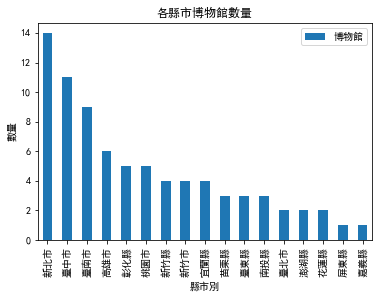

In [12]:
# Set Traditional Chinese fonts.
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# Graph a plot.
df_museum.plot(kind='bar')
plt.title('各縣市博物館數量')
plt.xlabel('縣市別')
plt.ylabel('數量')

plt.show()